In [6]:
import tensorflow as tf
import matplotlib as plt
%matplotlib inline
import numpy as np

In [7]:
mnist = tf.keras.datasets.mnist #importing dataset of mnist

In [8]:
(X_train,y_train) , (X_test, y_test) = mnist.load_data() #loading dataset

In [10]:
len(X_train)

60000

In [11]:
import matplotlib.pyplot as plt

In [15]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

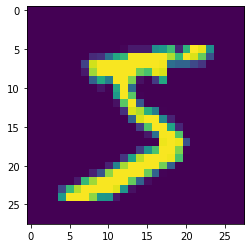

In [14]:
plt.imshow(X_train[0])

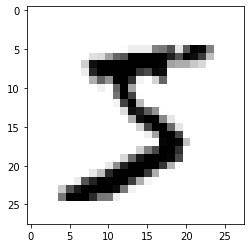

In [16]:
plt.imshow(X_train[0], cmap = plt.cm.binary)

In [21]:
#normalizing data of 0-255 to 0-1 range

X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

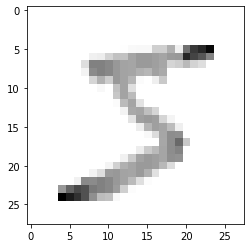

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [22]:
plt.imshow(X_train[0], cmap = plt.cm.binary)
plt.show()
print(X_train[0])

In [24]:
import tensorflow.keras.models
import tensorflow.keras.layers

In [29]:
#creating neural network model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation = tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation = tf.nn.softmax))

In [44]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
#compiling the model...

In [45]:
model.fit(X_train,y_train,epochs=5) #training the model

Epoch 1/5
1875/1875 [==============================] - 6s 2ms/step - loss: 0.2620 - accuracy: 0.9238
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1077 - accuracy: 0.9671
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0729 - accuracy: 0.9774
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0546 - accuracy: 0.9822
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0417 - accuracy: 0.9863


In [47]:
val_loss, val_acc = model.evaluate(X_test, y_test)
print(val_loss, val_acc) #validation_loss and validation_accuracy of the model

313/313 [==============================] - 1s 3ms/step - loss: 0.0901 - accuracy: 0.9744
0.09009844064712524 0.974399983882904


In [50]:
predictions = model.predict(X_test)
print(predictions) #predictions of testdata

[[4.7212607e-12 7.5565426e-10 1.0681001e-08 ... 9.9999988e-01
  1.4121101e-11 3.3148519e-09]
 [5.6725550e-13 8.2291681e-06 9.9999154e-01 ... 1.4554200e-08
  1.9449694e-11 5.3909260e-17]
 [3.9353697e-08 9.9960381e-01 3.5476664e-06 ... 3.5255915e-04
  3.3009142e-05 2.4031408e-07]
 ...
 [9.0969315e-10 4.7789889e-08 3.8479491e-09 ... 7.8975927e-06
  4.0559293e-08 1.1487439e-04]
 [5.4950613e-07 3.7458681e-06 1.9548543e-07 ... 5.0738900e-06
  2.1337697e-02 4.4887486e-08]
 [3.1016175e-08 1.5790129e-09 1.1298351e-09 ... 2.1459957e-11
  2.8206726e-09 1.5959825e-11]]


In [49]:
import numpy as np

In [52]:
print(np.argmax(predictions[0]))  #first image predicted value from test data

7


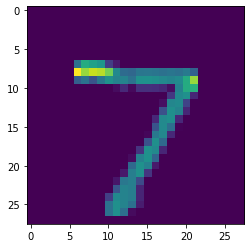

In [54]:
plt.imshow(X_test[0]) #actual image

In [56]:
len(X_test)

10000

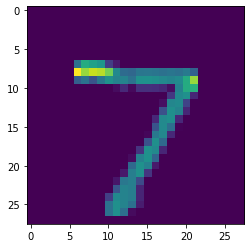

Prediction:  7


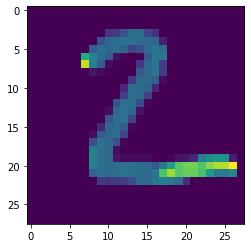

Prediction:  2


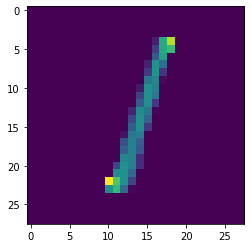

Prediction:  1


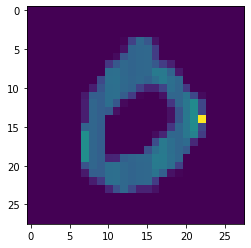

Prediction:  0


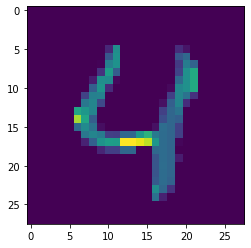

Prediction:  4


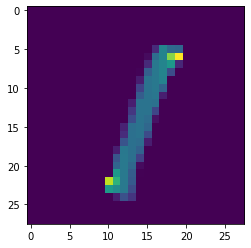

Prediction:  1


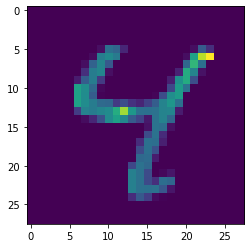

Prediction:  4


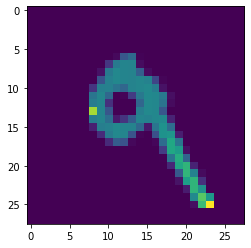

Prediction:  9


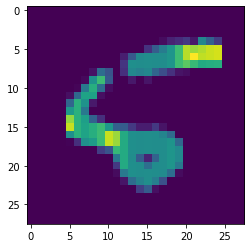

Prediction:  5


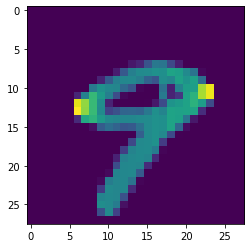

Prediction:  9


In [79]:
#lets see the predictions for the first 10 images

i = 0
for x in X_test:
    plt.imshow(x)
    plt.show()
    print("Prediction: ", np.argmax(predictions[i]))
    i = i+1
    if i == 10:
        break